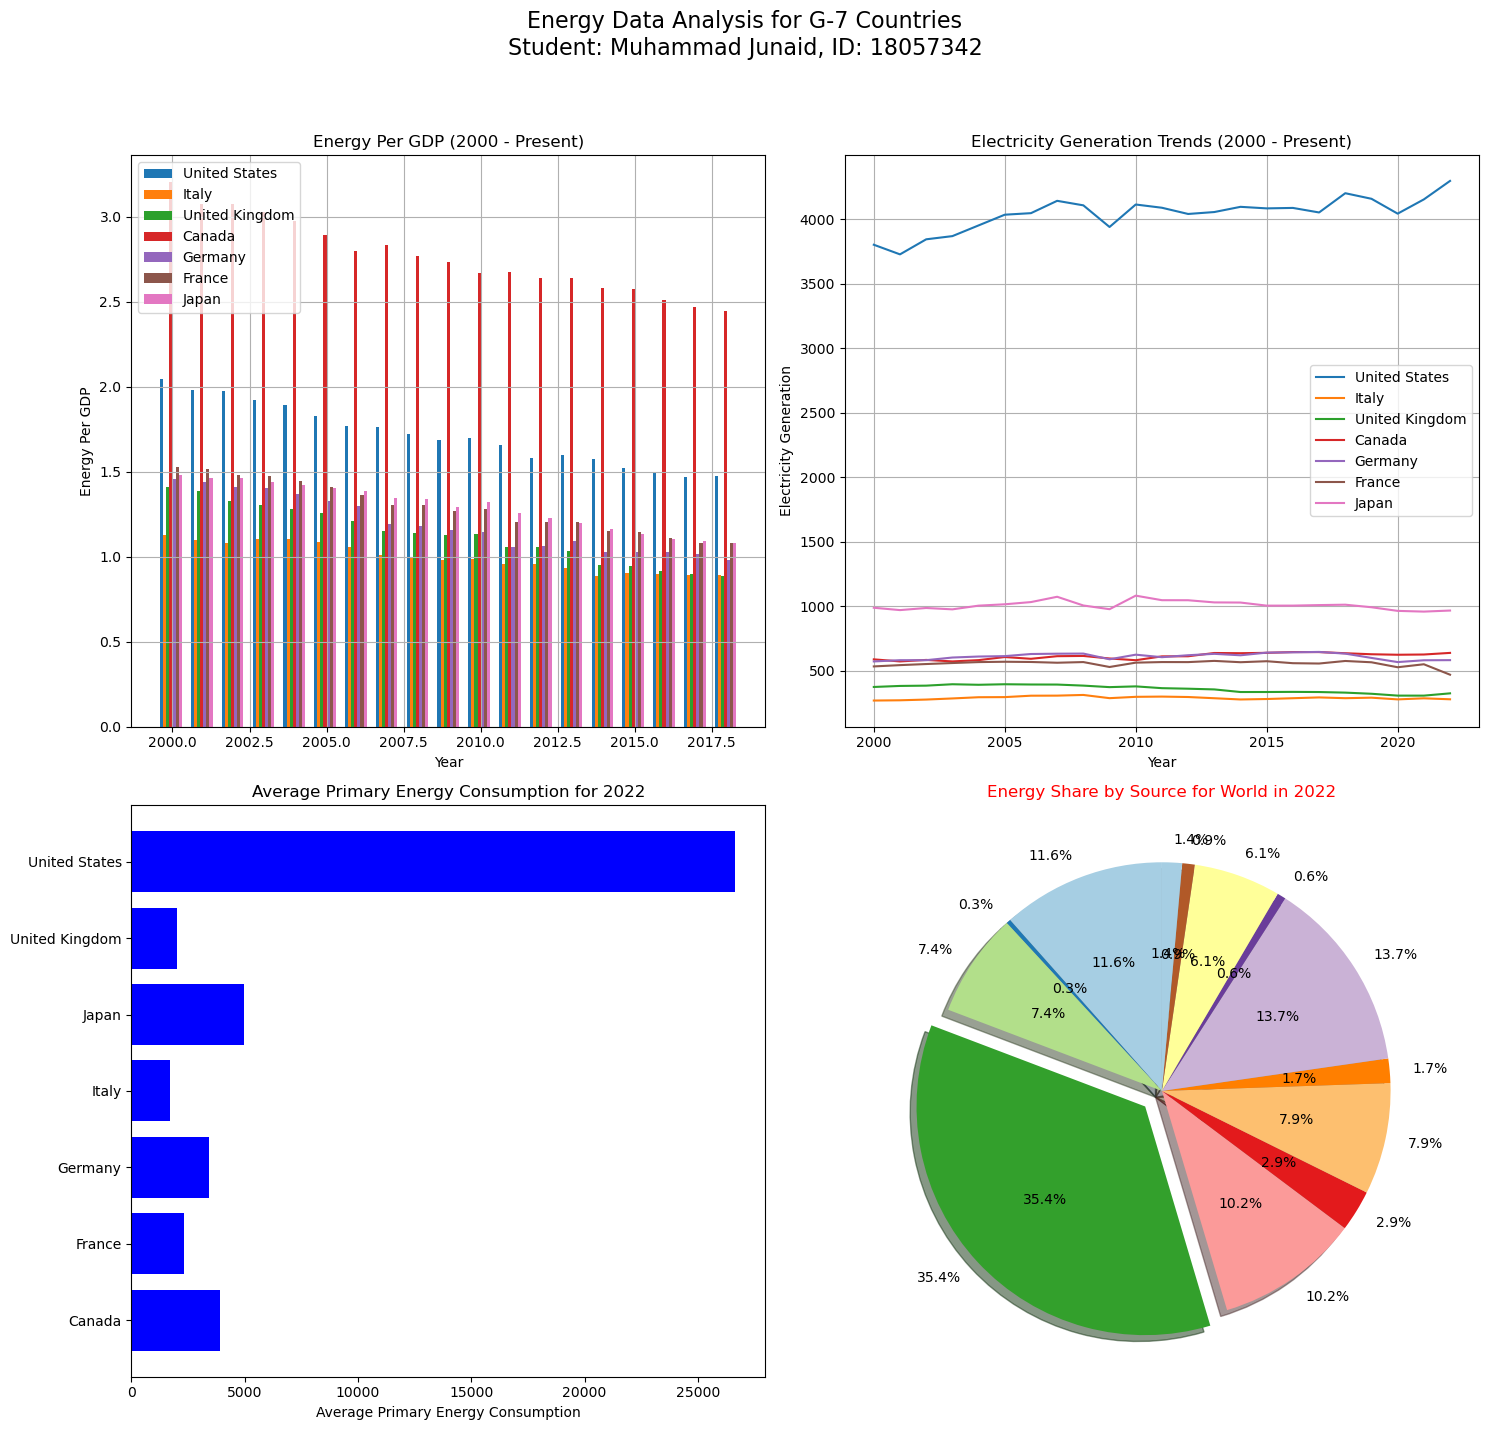

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the plot_energy_data function
def plot_energy_data(student_id):
    """
    Creates an infographic analyzing energy data for G-7 countries.
    Includes Energy per GDP, Electricity Generation Trends, Average Primary Energy Consumption,
    and Energy Share by Source for the World in 2022. The infographic includes a title with the student's name and ID.
    Output is saved as a PNG file named after the student's ID.
    """

    # Load the dataset
    data = pd.read_csv('World Energy Consumption.csv')

    # Extracting relevant columns
    energy_per_gdp_columns = ['country', 'year', 'energy_per_gdp']
    electricity_columns = ['country', 'year', 'electricity_generation']
    energy_demand_columns = ['country', 'year', 'primary_energy_consumption']
    share_energy_columns = ['coal_share_energy', 'biofuel_share_energy', 'electricity_share_energy', 
                            'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 
                            'low_carbon_share_energy', 'nuclear_share_energy', 'oil_share_energy', 
                            'other_renewables_share_energy', 'renewables_share_energy', 
                            'solar_share_energy', 'wind_share_energy']

    # Filter and process data
    countries = ['United States', 'Italy', 'United Kingdom', 'Canada', 'Germany', 'France', 'Japan']
    energy_per_gdp_data = data[energy_per_gdp_columns].query("country in @countries and year >= 2000")
    electricity_data = data[electricity_columns].query("country in @countries and year >= 2000")
    energy_demand_data = data[energy_demand_columns].query("country in @countries and year >= 2000")
    world_energy_data_2022 = data.query("country == 'World' and year == 2022")[share_energy_columns]

    # Prepare data for the pie chart
    share_energy_values = world_energy_data_2022.iloc[0]
    total_energy_share = share_energy_values.sum()
    autopct_values = [f'{(value/total_energy_share)*100:.1f}%' for value in share_energy_values]

    # Create subplot with 4 axes and set main title
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(f'Energy Data Analysis for G-7 Countries\nStudent: Muhammad Junaid, ID: {student_id}', fontsize=16, color='black')

    # Plot energy per GDP on axis [0, 0]
    for country in countries:
        country_data = energy_per_gdp_data[energy_per_gdp_data['country'] == country]
        offset = countries.index(country) - len(countries) / 2
        axs[0, 0].bar(country_data['year'] + offset * 0.1, country_data['energy_per_gdp'], width=0.1, label=country, align='center')

    axs[0, 0].set_xlabel('Year')
    axs[0, 0].set_ylabel('Energy Per GDP')
    axs[0, 0].set_title('Energy Per GDP (2000 - Present)')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plotting electricity generation trends on axis [0, 1]
    for country in countries:
        country_electricity_data = electricity_data[electricity_data['country'] == country]
        axs[0, 1].plot(country_electricity_data['year'], country_electricity_data['electricity_generation'], label=f'{country}')

    axs[0, 1].set_xlabel('Year')
    axs[0, 1].set_ylabel('Electricity Generation')
    axs[0, 1].set_title('Electricity Generation Trends (2000 - Present)')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plotting energy demand trends on axis [1, 0]
    latest_year = energy_demand_data['year'].max()
    latest_energy_demand_data = energy_demand_data[energy_demand_data['year'] == latest_year].groupby('country').mean()
    axs[1, 0].barh(latest_energy_demand_data.index, latest_energy_demand_data['primary_energy_consumption'], color='blue')
    axs[1, 0].set_xlabel('Average Primary Energy Consumption')
    axs[1, 0].set_title(f'Average Primary Energy Consumption for {latest_year}')

    # Adding 'explode' for larger values in the pie chart [1, 1]
    explode = [0.1 if value == max(share_energy_values) else 0 for value in share_energy_values]
    wedges, texts, autotexts = axs[1, 1].pie(share_energy_values, explode=explode, labels=autopct_values, startangle=90, colors=plt.cm.Paired.colors, shadow=True, autopct='%1.1f%%')
    axs[1, 1].set_title('Energy Share by Source for World in 2022', color='red')

    # Adjusting layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot as a PNG file
    plt.savefig(f'{student_id}.png', dpi=300)

# Call the function with an example student ID
plot_energy_data('18057342')
